In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
path_list = []

In [ ]:
for dirname, dirs, filenames in os.walk('/content/drive/MyDrive/GlobalAIHub/spectrograms'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path_list.append(os.path.join(dirname, filename))

In [ ]:
len(path_list)

8732

In [ ]:
path_list[-1].split('/')[-2]

'7'

In [ ]:
norm_list = []

In [ ]:
image = cv2.imread(path_list[1])
image.shape
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray_image, (256, 256), interpolation = cv2.INTER_AREA)
normalized = resized / 255
norm_list.append(normalized)


In [ ]:
# Preprocessing

preprocessed_image_list = []
label_list = []

for i in path_list:
  image = cv2.imread(i)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized = cv2.resize(gray_image, (256, 256), interpolation = cv2.INTER_AREA)
  normalized = resized / 255
  preprocessed_image_list.append(normalized)
  label = i.split('/')[-2]
  label_list.append(label)

In [ ]:
len(label_list)

8732

In [ ]:
preprocessed_image_list[1].shape

(256, 256)

In [ ]:
len(preprocessed_image_list)

8732

In [ ]:
type(label_list[0])

str

In [ ]:
label_list = [int(s) for s in label_list]

In [ ]:
type(label_list[0])

int

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
       preprocessed_image_list, label_list, test_size=0.3, random_state = 42)

X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, test_size=0.5)

In [ ]:
# Model

model = tf.keras.Sequential()


In [ ]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(256,256,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout((0.5)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout((0.5)))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(np.array(y_train))

6112

In [ ]:
type(y_train[0])

int

In [ ]:
results = model.fit(np.array(X_train), np.array(y_train),
                    batch_size=4,
                    epochs=50,
                    validation_data=(np.array(X_val), np.array(y_val)))

Epoch 1/50
1528/1528 [==============================] - 33s 13ms/step - loss: 1.9727 - accuracy: 0.2747 - val_loss: 1.5848 - val_accuracy: 0.4450
Epoch 2/50
1528/1528 [==============================] - 19s 12ms/step - loss: 1.5388 - accuracy: 0.4382 - val_loss: 1.1960 - val_accuracy: 0.5557
Epoch 3/50
1528/1528 [==============================] - 19s 12ms/step - loss: 1.3059 - accuracy: 0.5304 - val_loss: 1.0331 - val_accuracy: 0.6634
Epoch 4/50
1528/1528 [==============================] - 19s 12ms/step - loss: 1.1792 - accuracy: 0.5892 - val_loss: 1.0248 - val_accuracy: 0.6656
Epoch 5/50
1528/1528 [==============================] - 19s 12ms/step - loss: 1.0708 - accuracy: 0.6183 - val_loss: 0.9155 - val_accuracy: 0.7092
Epoch 6/50
1528/1528 [==============================] - 19s 12ms/step - loss: 0.9702 - accuracy: 0.6648 - val_loss: 0.8579 - val_accuracy: 0.7244
Epoch 7/50
1528/1528 [==============================] - 19s 12ms/step - loss: 0.8780 - accuracy: 0.6832 - val_loss: 0.7887 -

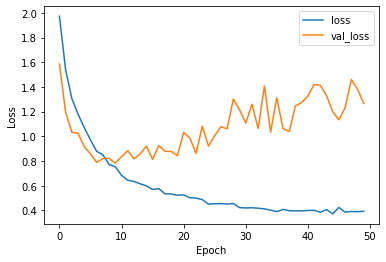

In [ ]:
plt.plot(results.history['loss'], label='loss')

plt.plot(results.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

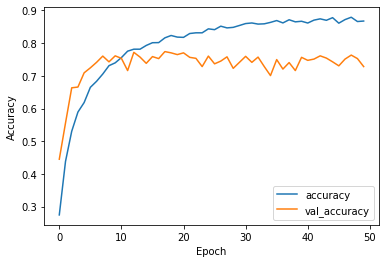

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')

plt.plot(results.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(np.array(X_test), np.array(y_test))

41/41 [==============================] - 2s 31ms/step - loss: 1.1137 - accuracy: 0.7542


[1.1137220859527588, 0.7541984915733337]

In [ ]:
prediction_result = model.predict(X_test[712].reshape(1,256,256,1))
prediction_result

array([[2.7266174e-04, 2.2755282e-02, 7.7699742e-04, 5.7318620e-03,
        1.4388066e-02, 4.3937236e-02, 5.8895245e-07, 8.8102591e-01,
        2.9782474e-03, 2.8133135e-02]], dtype=float32)

In [ ]:
predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()

print(predicted_class)
print(predicted_probability)

7
0.8810259


In [ ]:
y_test[712]

7

In [ ]:
urbansound_df = pd.read_csv('/content/drive/MyDrive/GlobalAIHub/UrbanSound8K.csv')
urbansound_df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
urbansound_df = urbansound_df[['slice_file_name', 'classID', 'class']]
urbansound_df

,slice_file_name,classID,class
0,100032-3-0-0.wav,3,dog_bark
1,100263-2-0-117.wav,2,children_playing
2,100263-2-0-121.wav,2,children_playing
3,100263-2-0-126.wav,2,children_playing
4,100263-2-0-137.wav,2,children_playing
...,...,...,...
8727,99812-1-2-0.wav,1,car_horn
8728,99812-1-3-0.wav,1,car_horn
8729,99812-1-4-0.wav,1,car_horn
8730,99812-1-5-0.wav,1,car_horn


* classID:

A numeric identifier of the sound class:

0 = air_conditioner

1 = car_horn

2 = children_playing

3 = dog_bark

4 = drilling

5 = engine_idling

6 = gun_shot

7 = jackhammer

8 = siren

9 = street_music